In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import string

## Сэмплирование

In [126]:
# создадим тестовый датасет
data_size = 120
df = pd.DataFrame({'A': np.arange(0, data_size, 1, dtype=int),
                     'B': np.linspace(0, 1, data_size),
                     'C': random.choices(['a', 'c'], k=data_size),
                     'D': np.abs(np.random.normal(size=data_size)).astype(str),
                     'E': [''.join([x for x in ''.join(random.choices(string.ascii_letters, k=15))]) for x in range(data_size)],
                     'F': random.choices(['s', 'f', 'd', 'r'], k=data_size),})

df.loc[[4, 7], 'D'] = np.nan
df.loc[5, 'D'] = 'some text'
df.head()

,A,B,C,D,E,F
0,0,0.000000,a,0.2862520536423341,fKDKbOLdMyvsYGh,f
1,1,0.008403,a,0.5340655220975151,VUKIixpnEoXQpqT,d
2,2,0.016807,c,0.5822409730784568,vRegfJInsAiFOyc,f
3,3,0.025210,c,0.9434913217778904,fqrAgMZrJdhbbxf,r
4,4,0.033613,c,NaN,PWuBlYZOxrAhzuB,r


In [125]:
# Как семплировать данные из датасета

sample = df.sample(frac=1.0, replace=True)
sample.head()

,A,B,C,D,E,F
76,76,0.638655,a,1.272242967045945,JjJRLaFUQUVpEng,f
7,7,0.058824,c,NaN,bJKawXRKwPjwrde,s
103,103,0.865546,c,0.9959168076569643,IIZMRfFHgRQjIhW,s
51,51,0.428571,c,0.6072105845205573,kNqZNOrTlROmQGl,r
116,116,0.974790,a,1.259028416479154,ZBTzKpcIdtVkHnS,r


# Оценки - точечные и интервальные

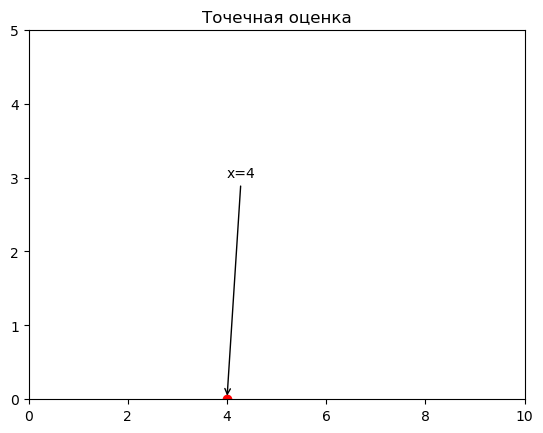

In [60]:
plt.figure()
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.annotate("x=4", xy=(4, 0.01), xytext=(4, 3), arrowprops=dict(arrowstyle="->"))
plt.scatter(4, 0.01, color='r')
plt.title('Точечная оценка')
plt.show()

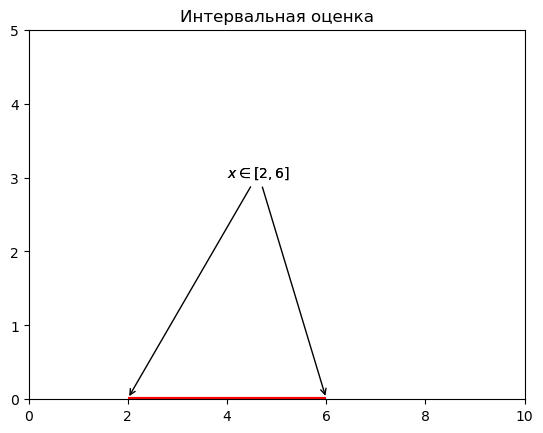

In [61]:
plt.plot()
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.hlines(y=0.01, xmin=2, xmax=6, color='r', linewidth=3)
plt.annotate(r"$x\in [2,6]$", xy=(2, 0.01), xytext=(4, 3), arrowprops=dict(arrowstyle="->"))
plt.annotate(r"$x\in [2,6]$", xy=(6, 0.01), xytext=(4, 3), arrowprops=dict(arrowstyle="->"))
plt.title('Интервальная оценка')
plt.show()

## Нормальное распределенеи

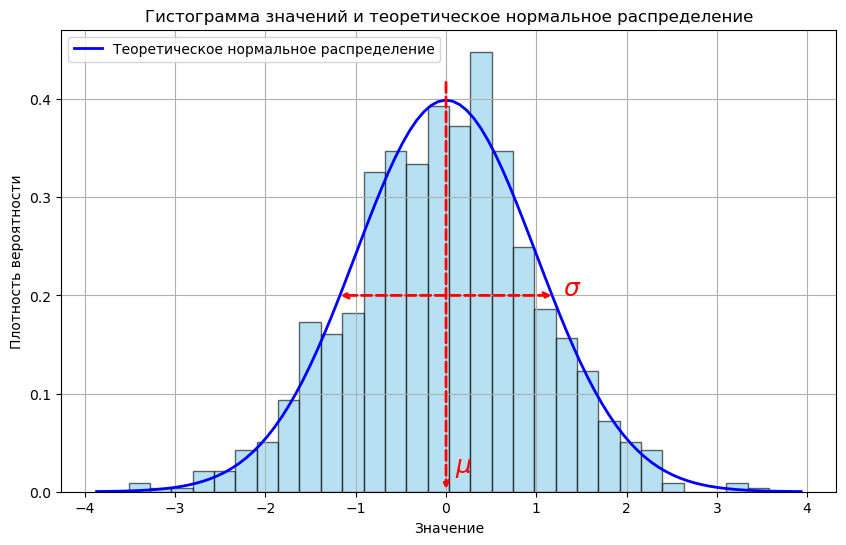

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Генерация случайных данных, распределённых нормально
mu, sigma = 0, 1  # Среднее и стандартное отклонение
data = np.random.normal(mu, sigma, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Построение теоретической плотности вероятности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, color='blue', linewidth=2, label='Теоретическое нормальное распределение')
plt.title('Гистограмма значений и теоретическое нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

plt.annotate("", xy=(0, 0), xytext=(0, 0.42), 
            arrowprops=dict(arrowstyle="->", linestyle='--', color='r', linewidth=2))
plt.text(x=0.1, y=0.02, s=r'$\mu$', color='r', weight="bold", size=18)
plt.annotate("", xy=(-1.2, 0.2), xytext=(1.2, 0.2), 
            arrowprops=dict(arrowstyle="<->", linestyle='--', color='r', linewidth=2))
plt.text(x=1.3, y=0.2, s=r'$\sigma$', color='r', weight="bold", size=18)

plt.show()


## Распределение Пуассона

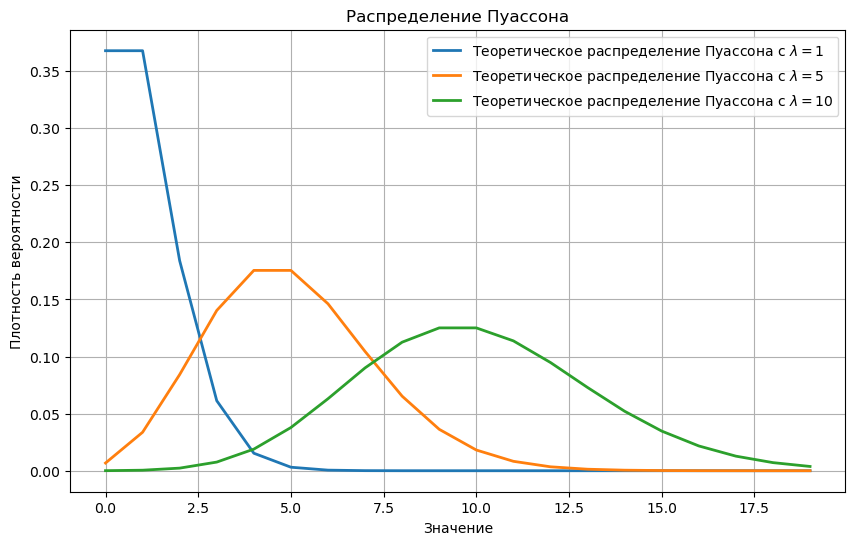

In [120]:
from scipy.stats import poisson

# Параметры распределения Пуассона
mu = 5  # Среднее значение (λ)

# Генерация случайных данных, распределённых по распределению Пуассона
data = np.random.poisson(mu, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
# count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Построение теоретической плотности вероятности распределения Пуассона
# xmin, xmax = plt.xlim()
x = np.arange(0, 20)
p_1 = poisson.pmf(x, 1)
p_5 = poisson.pmf(x, 5)
p_10 = poisson.pmf(x, 10)

plt.plot(x, p_1, linewidth=2, label=r'Теоретическое распределение Пуассона с $\lambda = 1$')
plt.plot(x, p_5,  linewidth=2, label=r'Теоретическое распределение Пуассона с $\lambda = 5$')
plt.plot(x, p_10, linewidth=2, label=r'Теоретическое распределение Пуассона с $\lambda = 10$')
plt.title('Распределение Пуассона')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()


## Распределение Стьюдента

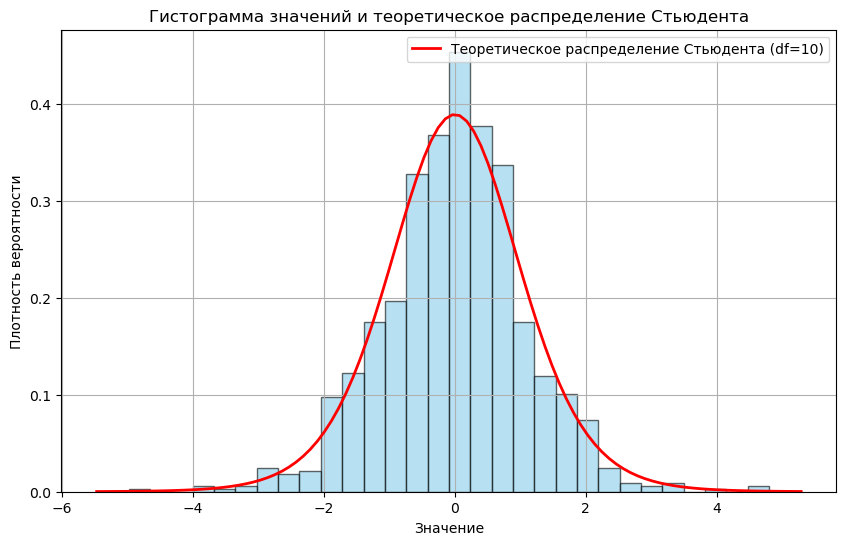

In [105]:
from scipy.stats import t

# Параметры распределения Стьюдента
df = 10  # Количество степеней свободы

# Генерация случайных данных, распределённых по распределению Стьюдента
data = np.random.standard_t(df, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Построение теоретической плотности вероятности распределения Стьюдента
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, df)

plt.plot(x, p, 'r', linewidth=2, label=f'Теоретическое распределение Стьюдента (df={df})')
plt.title('Гистограмма значений и теоретическое распределение Стьюдента')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()


## ## Распределение Стьюдента и нормальное распределение

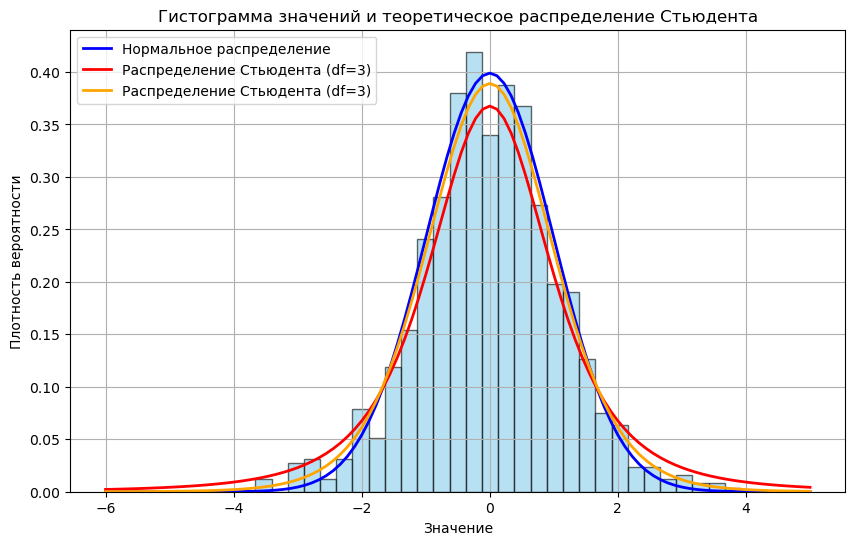

In [117]:

# Параметры распределения Стьюдента
df = 10  # Количество степеней свободы
mu, sigma = 0, 1  # Среднее и стандартное отклонение Нормального распределения

# Генерация случайных данных, распределённых по распределению Стьюдента
data = np.random.standard_t(df, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Построение теоретической плотности вероятности распределения Стьюдента
# xmin, xmax = plt.xlim()
x = np.linspace(-6, 5, 100)
p_10 = t.pdf(x, 10)
p_3 = t.pdf(x, 3)

p_n = norm.pdf(x, mu, sigma)

plt.plot(x, p_n, color='blue', linewidth=2, label='Нормальное распределение')
plt.plot(x, p_3, 'r', linewidth=2, label=f'Распределение Стьюдента (df={3})')
plt.plot(x, p_10, 'orange', linewidth=2, label=f'Распределение Стьюдента (df={3})')
plt.title('Гистограмма значений и теоретическое распределение Стьюдента')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Распределение $\chi^2$

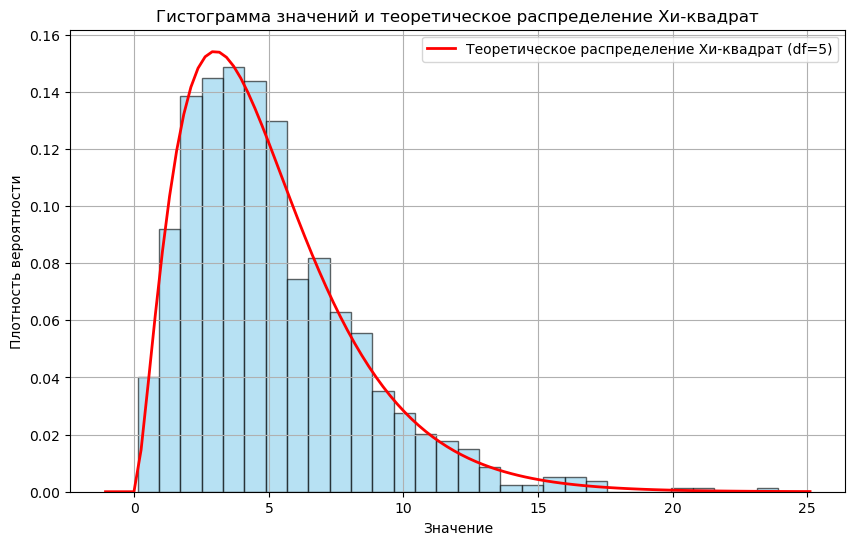

In [118]:
from scipy.stats import chi2

# Параметры распределения Хи-квадрат
df = 5  # Количество степеней свободы

# Генерация случайных данных, распределённых по распределению Хи-квадрат
data = np.random.chisquare(df, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Построение теоретической плотности вероятности распределения Хи-квадрат
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_chi2 = chi2.pdf(x, df)

plt.plot(x, p_chi2, 'r', linewidth=2, label=f'Теоретическое распределение Хи-квадрат (df={df})')
plt.title('Гистограмма значений и теоретическое распределение Хи-квадрат')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()


## Биномиальное распределение

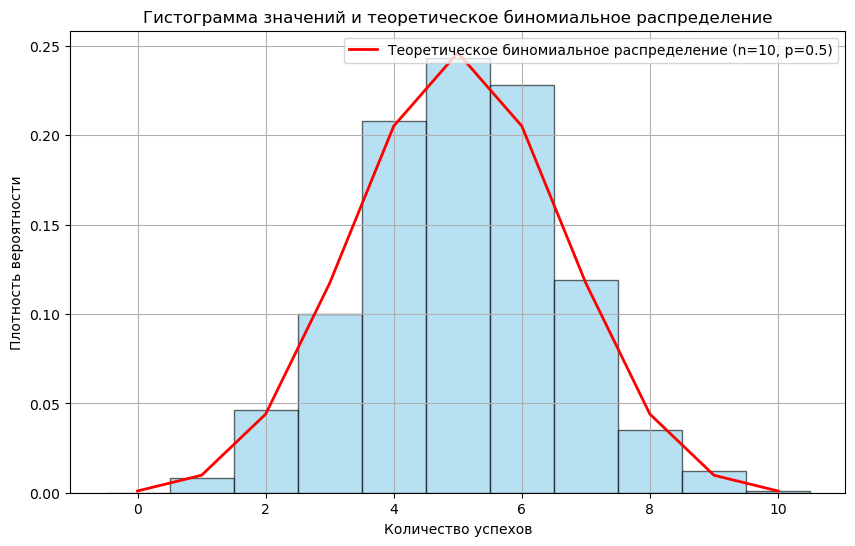

In [121]:
from scipy.stats import binom

# Параметры биномиального распределения
n = 10  # Количество испытаний
p = 0.5  # Вероятность успеха

# Генерация случайных данных, распределённых по биномиальному распределению
data = np.random.binomial(n, p, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=np.arange(0, n+2)-0.5, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Построение теоретической функции вероятности биномиального распределения
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

plt.plot(x, pmf, 'r', linewidth=2, label=f'Теоретическое биномиальное распределение (n={n}, p={p})')
plt.title('Гистограмма значений и теоретическое биномиальное распределение')
plt.xlabel('Количество успехов')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()


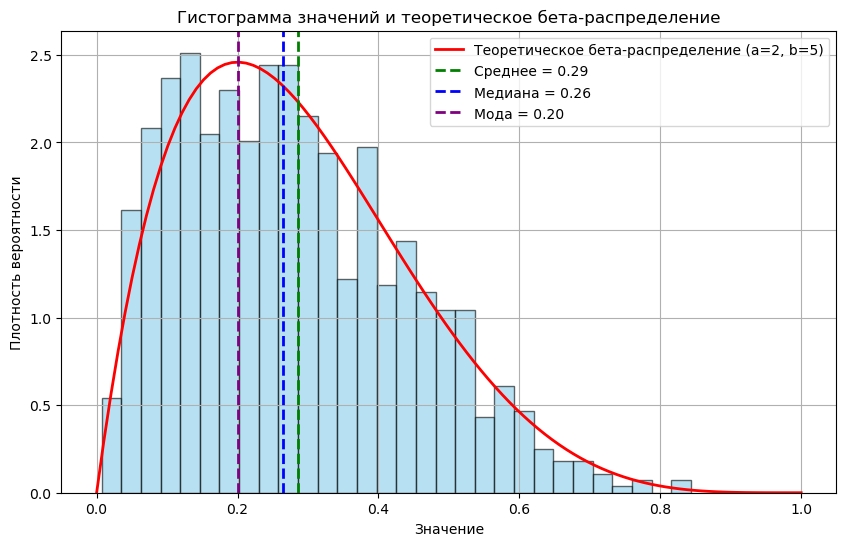

In [13]:
from scipy.stats import beta

# Параметры бета-распределения
a, b = 2, 5  # Параметры распределения

# Генерация случайных данных, распределённых по бета-распределению
data = np.random.beta(a, b, 1000)

# Построение гистограммы данных
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Теоретическая плотность вероятности бета-распределения
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf, 'r', linewidth=2, label=f'Теоретическое бета-распределение (a={a}, b={b})')

# Вычисление среднего, медианы и моды
mean = a / (a + b)
median = beta.median(a, b)
mode = (a - 1) / (a + b - 2) if a > 1 and b > 1 else np.nan  # Проверка, что a и b > 1 для вычисления моды

# Отметка среднего, медианы и моды на графике
plt.axvline(mean, color='green', linestyle='--', linewidth=2, label=f'Среднее = {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Медиана = {median:.2f}')
if not np.isnan(mode):
    plt.axvline(mode, color='purple', linestyle='--', linewidth=2, label=f'Мода = {mode:.2f}')

# Настройка графика
plt.title('Гистограмма значений и теоретическое бета-распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
# plt.savefig('beta-central.png')
plt.show()
